### Import libraries and split data to train and test sets

In [1]:
"""Import library"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#--Load data---
df=pd.read_csv('18E20a00.csv')

#--Split to features and target
X=df.drop(['Not_filtered'],axis=1).values
y=df['Not_filtered'].values

#--Split to train and test set---
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Verify that y_train and y_test has similar percentage of 0,1 (negative,positive)

In [2]:
#--Verify how many 0,1 are in y----
unique,counts=np.unique(y,return_counts=True)
y_unique_counts=np.array((unique,counts))
print(y_unique_counts)

#--Verify percentate of 0 and 1 in y_train-----
unique,counts=np.unique(y_test,return_counts=True)
y_test_unique_counts=np.array((unique,counts))
print(y_test_unique_counts)

#--Save X and y column title---
X_column=df.columns[1:len(df.columns)].tolist()
y_column=df.columns[0:1].tolist()

[[  0   1]
 [229 892]]
[[  0   1]
 [ 52 229]]


### K-nearest-neighbor, use GridSearchCV to find optimal n_neighbor=16

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#--Create hyperparameter grid---
parameters={'n_neighbors':np.arange(1,50)}
#--Initiate KNN model----
knn=KNeighborsClassifier()
#--Setup GridSearchCV object---
knn_gridcv=GridSearchCV(knn,param_grid=parameters,cv=5)

#--Fit---
knn_gridcv.fit(X_train,y_train)
#--Predict--
y_pred=knn_gridcv.predict(X_test)

#--Accuracy score---
acc=knn_gridcv.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Tuned KNN number of neighbors is {}'.format(knn_gridcv.best_params_))
print('Best score is {}'.format(knn_gridcv.best_score_))
print('Accuracy is {}'.format(acc))

Tuned KNN number of neighbors is {'n_neighbors': 16}
Best score is 0.8071428571428572
Accuracy is 0.8434163701067615


### KNN model with n_neighbor=16

In [7]:
"""K-nearest-neighbors classifier"""
"""Use n_neighbors=16"""#--Initiate KNN model----
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=16)

#--Cross validation score--
cv_scores=cross_val_score(knn,X_train,y_train,cv=5)

#--Fit---
knn.fit(X_train,y_train)
#--Predict--
y_pred=knn.predict(X_test)

#--Accuracy score---
acc=knn.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Cross validation score is: {}'.format(cv_scores))
print('Average 5-fold cross validation score is: {}'.format(np.mean(cv_scores)))
print('Accuracy is {}'.format(acc))
print('---Below is classification report---')
print(classification_report(y_test,y_pred))
print('---Below is confusion matrix----')
print(confusion_matrix(y_test,y_pred))

Cross validation score is: [0.77514793 0.81656805 0.80952381 0.82035928 0.81437126]
Average 5-fold cross validation score is: 0.8071940649554653
Accuracy is 0.8434163701067615
---Below is classification report---
              precision    recall  f1-score   support

           0       0.68      0.29      0.41        52
           1       0.86      0.97      0.91       229

   micro avg       0.84      0.84      0.84       281
   macro avg       0.77      0.63      0.66       281
weighted avg       0.82      0.84      0.82       281

---Below is confusion matrix----
[[ 15  37]
 [  7 222]]


In [25]:
"""Feature scaling under neural network"""
from sklearn.preprocessing import StandardScaler
#--Create feature scaler object--------
scaler=StandardScaler()
#--Fit to the scaler object-----
scaler.fit(X_train)
#--Transform to get scaled dataset----
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [27]:
"""Scikit Learn Neural Network"""
from sklearn.model_selection import GridSearchCV

#--Number of features------
n_features=X_train.shape[1]
#--Create neural network----
#--Only created one hidden layer with number of nodes equals to inputs----
mlp=MLPClassifier(hidden_layer_sizes=(n_features,),max_iter=200)

"""GridSearchCV to find optimal parameters"""
parameters={'alpha':np.arange(0.00001,0.001,0.0001),
            'activation':('relu','logistic')}

#--Setup GridSearchCV object---
mlp_gridcv=GridSearchCV(mlp,param_grid=parameters,cv=5)

#--Fit---
mlp_gridcv.fit(X_train_scaled,y_train)
#--Predict--
y_pred=mlp_gridcv.predict(X_test_scaled)

#--Accuracy score---
acc=mlp_gridcv.score(X_test_scaled,y_test)

#--Output of tune parameters and performance--
print('Tuned alpha regularization and activation is {}'.format(mlp_gridcv.best_params_))
print('Best score is {}'.format(mlp_gridcv.best_score_))
print('Accuracy is {}'.format(acc))

c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

Tuned alpha regularization and activation is {'activation': 'relu', 'alpha': 0.00041000000000000005}
Best score is 0.875
Accuracy is 0.8754448398576512


c:\program files\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy is 0.8790035587188612.
Cofusion matrix is:
[[ 26  26]
 [  8 221]]
Classification report is
             precision    recall  f1-score   support

          0       0.76      0.50      0.60        52
          1       0.89      0.97      0.93       229

avg / total       0.87      0.88      0.87       281



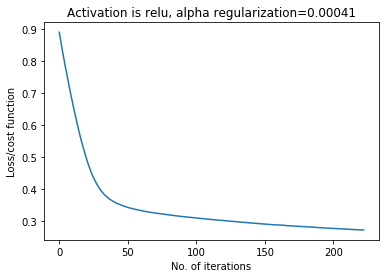

In [35]:
import matplotlib.pyplot as plt

mlp=MLPClassifier(hidden_layer_sizes=(n_features,),activation='relu',alpha=0.00041,max_iter=500)
#--Fit---
mlp.fit(X_train_scaled,y_train)
#--Predict------
y_pred=mlp.predict(X_test_scaled)

#--Outputs-------
print("Accuracy is {}.".format(mlp.score(X_test_scaled,y_test)))
print("Cofusion matrix is:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report is\n{}".format(classification_report(y_test,y_pred)))

#--Plots cost vs iteration----
plt.ylabel('Loss/cost function')
plt.xlabel('No. of iterations')
plt.title('Activation is relu, alpha regularization=0.00041')
plt.plot(mlp.loss_curve_)
plt.show()

# BELOW ARE ACTUAL CODE

In [ ]:
"""Import library"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#--Load data---
df=pd.read_csv('18E20a00.csv')

#--Split to features and target
X=df.drop(['Not_filtered'],axis=1).values
y=df['Not_filtered'].values

#--Split to train and test set---
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#--Verify how many 0,1 are in y----
unique,counts=np.unique(y,return_counts=True)
y_unique_counts=np.array((unique,counts))
print(y_unique_counts)

#--Verify percentate of 0 and 1 in y_train-----
unique,counts=np.unique(y_test,return_counts=True)
y_test_unique_counts=np.array((unique,counts))
print(y_test_unique_counts)

#--Save X and y column title---
X_column=df.columns[1:len(df.columns)].tolist()
y_column=df.columns[0:1].tolist()


In [ ]:
"""KNN neighobrs, find out n_neighbors=16 is best"""
from sklearn.neighbors import KNeighborsClassifier
#--Create hyperparameter grid---
parameters={'n_neighbors':np.arange(1,50)}
#--Initiate KNN model----
knn=KNeighborsClassifier()
#--Setup GridSearchCV object---
knn_gridcv=GridSearchCV(knn,param_grid=parameters,cv=5)

#--Fit---
knn_gridcv.fit(X_train,y_train)
#--Predict--
y_pred=knn_gridcv.predict(X_test)

#--Accuracy score---
acc=knn_gridcv.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Tuned KNN number of neighbors is {}'.format(knn_gridcv.best_params_))
print('Best score is {}'.format(knn_gridcv.best_score_))
print('Accuracy is {}'.format(acc))

In [ ]:
"""K-nearest-neighbors classifier"""
"""Use n_neighbors=16"""#--Initiate KNN model----
knn=KNeighborsClassifier(n_neighbors=16)

#--Cross validation score--
cv_scores=cross_val_score(knn,X_train,y_train,cv=5)

#--Fit---
knn.fit(X_train,y_train)
#--Predict--
y_pred=knn.predict(X_test)

#--Accuracy score---
acc=knn.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Cross validation score is: {}'.format(cv_scores))
print('Average 5-fold cross validation score is: {}'.format(np.mean(cv_scores)))
print('Accuracy is {}'.format(acc))
print('---Below is classification report---')
print(classification_report(y_test,y_pred))
print('---Below is confusion matrix----')
print(confusion_matrix(y_test,y_pred))

In [ ]:
"""Logistc Regression"""
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
acc_lr=lr.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Accuracy is logistc regression is {}'.format(acc_lr))
print('---Below is classification report (logistic regression)---')
print(classification_report(y_test,y_pred_lr))
print('---Below is confusion matrix (logistic regression)----')
print(confusion_matrix(y_test,y_pred_lr))

In [ ]:
"""Feature scaling under neural network"""
from sklearn.preprocessing import StandardScaler
#--Create feature scaler object--------
scaler=StandardScaler()
#--Fit to the scaler object-----
scaler.fit(X_train)
#--Transform to get scaled dataset----
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
"""Scikit Learn Neural Network"""
"""Use GridSearchCV to find optimal parameters"""
"""Found alpha=0.00004 and activation=relu optimal with acc=0.87"""
"""But found iter=200 not converged"""
from sklearn.model_selection import GridSearchCV

#--Number of features------
n_features=X_train.shape[1]
#--Create neural network----
#--Only created one hidden layer with number of nodes equals to inputs----
mlp=MLPClassifier(hidden_layer_sizes=(n_features,),max_iter=200)

"""GridSearchCV to find optimal parameters"""
parameters={'alpha':np.arange(0.00001,0.001,0.0001),
           'activation':('relu','logistic')}

#--Setup GridSearchCV object---
mlp_gridcv=GridSearchCV(mlp,param_grid=parameters,cv=5)

#--Fit---
mlp_gridcv.fit(X_train,y_train)
#--Predict--
y_pred=mlp_gridcv.predict(X_test)

#--Accuracy score---
acc=mlp_gridcv.score(X_test,y_test)

#--Output of tune parameters and performance--
print('Tuned alpha regularization and activation is {}'.format(mlp_gridcv.best_params_))
print('Best score is {}'.format(mlp_gridcv.best_score_))
print('Accuracy is {}'.format(acc))

In [ ]:
"""Neural Network"""
"""Use optimal parameters"""
"""Found that max_iter=400 will converge"""
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

#--Number of features------
n_features=X_train.shape[1]
#--Create neural network----
#--Only created one hidden layer with number of nodes equals to inputs----
mlp=MLPClassifier(hidden_layer_sizes=(n_features,),activation='relu',alpha=0.00041,max_iter=200)
#--Fit---
mlp.fit(X_train_scaled,y_train)
#--Predict------
y_pred=mlp.predict(X_test_scaled)
#--Outputs-------
print("Accuracy is {}.".format(mlp.score(X_test_scaled,y_test)))
print("Cofusion matrix is:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report is\n{}".format(classification_report(y_test,y_pred)))

#--Plots cost vs iteration----
plt.ylabel('Loss/cost function')
plt.xlabel('No. of iterations')
plt.title('Activation is relu, alpha regularization=0.00041')
plt.plot(mlp.loss_curve_)
plt.show()